<a href="https://colab.research.google.com/github/Karthikeya201202/U_NET-for-Landslides/blob/main/U_net_Landslide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
import os
os.chdir(r'/content/drive/MyDrive/Lanslide_Detection')

In [ ]:
dir= os.getcwd()
dir

'/content/drive/MyDrive/Lanslide_Detection'

In [ ]:
# Let's check the images in the training file

train_dir = os.chdir(r"/content/drive/MyDrive/Lanslide_Detection/Train")
print(train_dir)
image5 = r"/content/drive/MyDrive/Lanslide_Detection/Train/img/image_5.h5"
mask5 = r"/content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_5.h5"

None


ls ['mask']
input data shape: (128, 128)


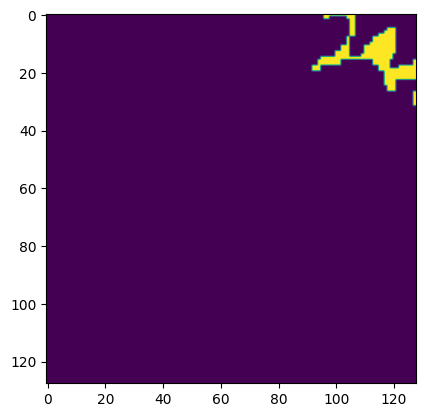

In [ ]:
with h5py.File(mask5) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

ls ['img']
input data shape: (128, 128, 14)


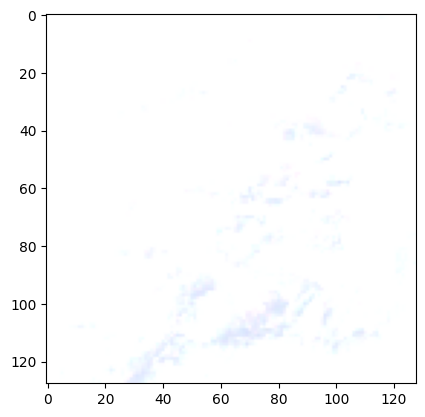

In [ ]:
with h5py.File(image5) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])

In [ ]:
train_img = r"/content/drive/MyDrive/Lanslide_Detection/Train/img/*.h5"
train_mask = r"/content/drive/MyDrive/Lanslide_Detection/Train/mask/*.h5"

In [ ]:
train_X = np.zeros((3799, 128, 128, 6))
train_Y = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(train_img))
all_mask = sorted(glob.glob(train_mask))

In [ ]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

        # final array
        train_X[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        train_X[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        train_X[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        train_X[i, :, :, 3] = data_ndvi #NDVI
        train_X[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        train_X[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

    with h5py.File(mask) as hdf:
      ls = list(hdf.keys())
      data=np.array(hdf.get('mask'))
      train_Y[i, :, :, 0] = data



0 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_1.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_1.h5
1 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_10.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_10.h5
2 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_100.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_100.h5
3 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_1000.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_1000.h5
4 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_1001.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_1001.h5
5 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_1002.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_1002.h5
6 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_1003.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_1003.h5
7 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_1004.h5 /conte

<ipython-input-9-20b7fe6f1f0a>:25: RuntimeWarning: invalid value encountered in divide
  train_X[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1672 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_2503.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_2503.h5
1673 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_2504.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_2504.h5
1674 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_2505.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_2505.h5
1675 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_2506.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_2506.h5
1676 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_2507.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_2507.h5
1677 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_2508.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_2508.h5
1678 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_2509.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_2509.h5
1679 /content/drive/MyDrive/Lanslide_Dete

<ipython-input-9-20b7fe6f1f0a>:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2267 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_3039.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_3039.h5
2268 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_304.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_304.h5
2269 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_3040.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_3040.h5
2270 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_3041.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_3041.h5
2271 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_3042.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_3042.h5
2272 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_3043.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_3043.h5
2273 /content/drive/MyDrive/Lanslide_Detection/Train/img/image_3044.h5 /content/drive/MyDrive/Lanslide_Detection/Train/mask/mask_3044.h5
2274 /content/drive/MyDrive/Lanslide_Detect

In [ ]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
train_X[np.isnan(train_X)] = 0.000001
print(train_X.min(), train_X.max(), train_Y.min(), train_Y.max())


-1.0 1.0 0.0 1.0


## Visualization of the training data

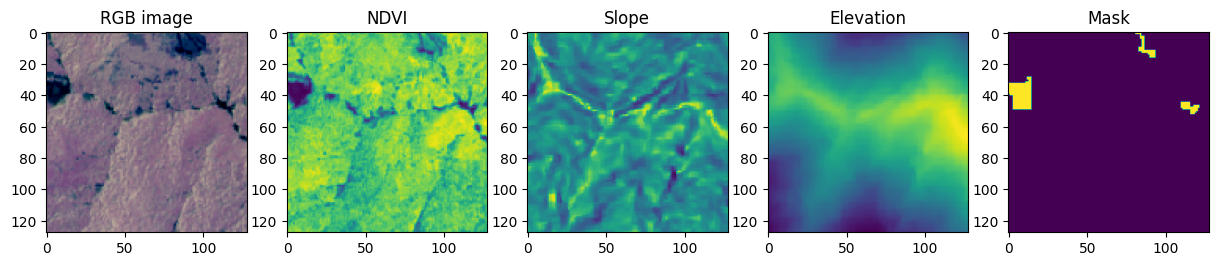

In [ ]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(train_X[img, :, :, 0:3])
ax2.imshow(train_X[img, :, :, 3])
ax3.imshow(train_X[img, :, :, 4])
ax4.imshow(train_X[img, :, :, 5])
ax5.imshow(train_Y[img, :, :, 0])

## Custom loss function
# Dice Loss

In [ ]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

In [ ]:
def jaccard_loss(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true + y_pred - y_true * y_pred, axis=[1, 2, 3])
    jaccard_index = intersection / (union + tf.keras.backend.epsilon())
    jaccard_loss = 1 - jaccard_index  # Use 1 - IoU to get the Jaccard loss
    return jaccard_loss

# Example usage:
#y_true = tf.constant([[[[1, 0, 0], [0, 1, 0], [0, 0, 1]]]], dtype=tf.float32)
#y_pred = tf.constant([[[[0.8, 0.1, 0.1], [0.2, 0.7, 0.1], [0.1, 0.1, 0.8]]]], dtype=tf.float32)

#loss = jaccard_loss(y_true, y_pred)
#print("Jaccard Loss:", loss.numpy())


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, shuffle= True)

In [ ]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [ ]:
# to release some memory, delete the unnecessary variable
del train_X
del train_Y
del all_train
del all_mask

## Unet Model

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


In [ ]:
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network.
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

In [ ]:
#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p


In [ ]:
#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

In [ ]:
#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
input_shape = (128,128,6)
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])

sigmoid


In [ ]:
model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 6)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         3520      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 128, 128, 64)         0         ['batch_normalization[0][0

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_f1_m", verbose=1, save_best_only=False, mode="max")
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
    ]

history = model.fit(x_train, y_train,
                    batch_size = 20,
                    verbose=1,
                    epochs=1,
                    validation_data=(x_valid, y_valid),
                    callbacks=callbacks,
                    shuffle=False)


model.save("model_save.h5")


152/152 [==============================] - ETA: 0s - loss: 0.1492 - accuracy: 0.9644 
Epoch 1: saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-a44e334af77d>", line 9, in <cell line: 9>
    history = model.fit(x_train, y_train,
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/h5py/_hl/files.py", line 567, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/usr/local/lib/python3.10/dist-packages/h5py/_hl/files.py", line 237, in make_fid
    fid = h5f.create(name, h5f.ACC_TRUNC, fapl=fapl, fcpl=fcpl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 126, in h5py.h5f.create
OSError: [Errno 107] Una

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-986eaae51d44>", line 1, in <cell line: 1>
    loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
ValueError: not enough values to unpack (expected 5, got 2)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lin

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-139cc5fc312e>", line 2, in <cell line: 2>
    ax11.plot(history.history['loss'])
NameError: name 'history' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/I

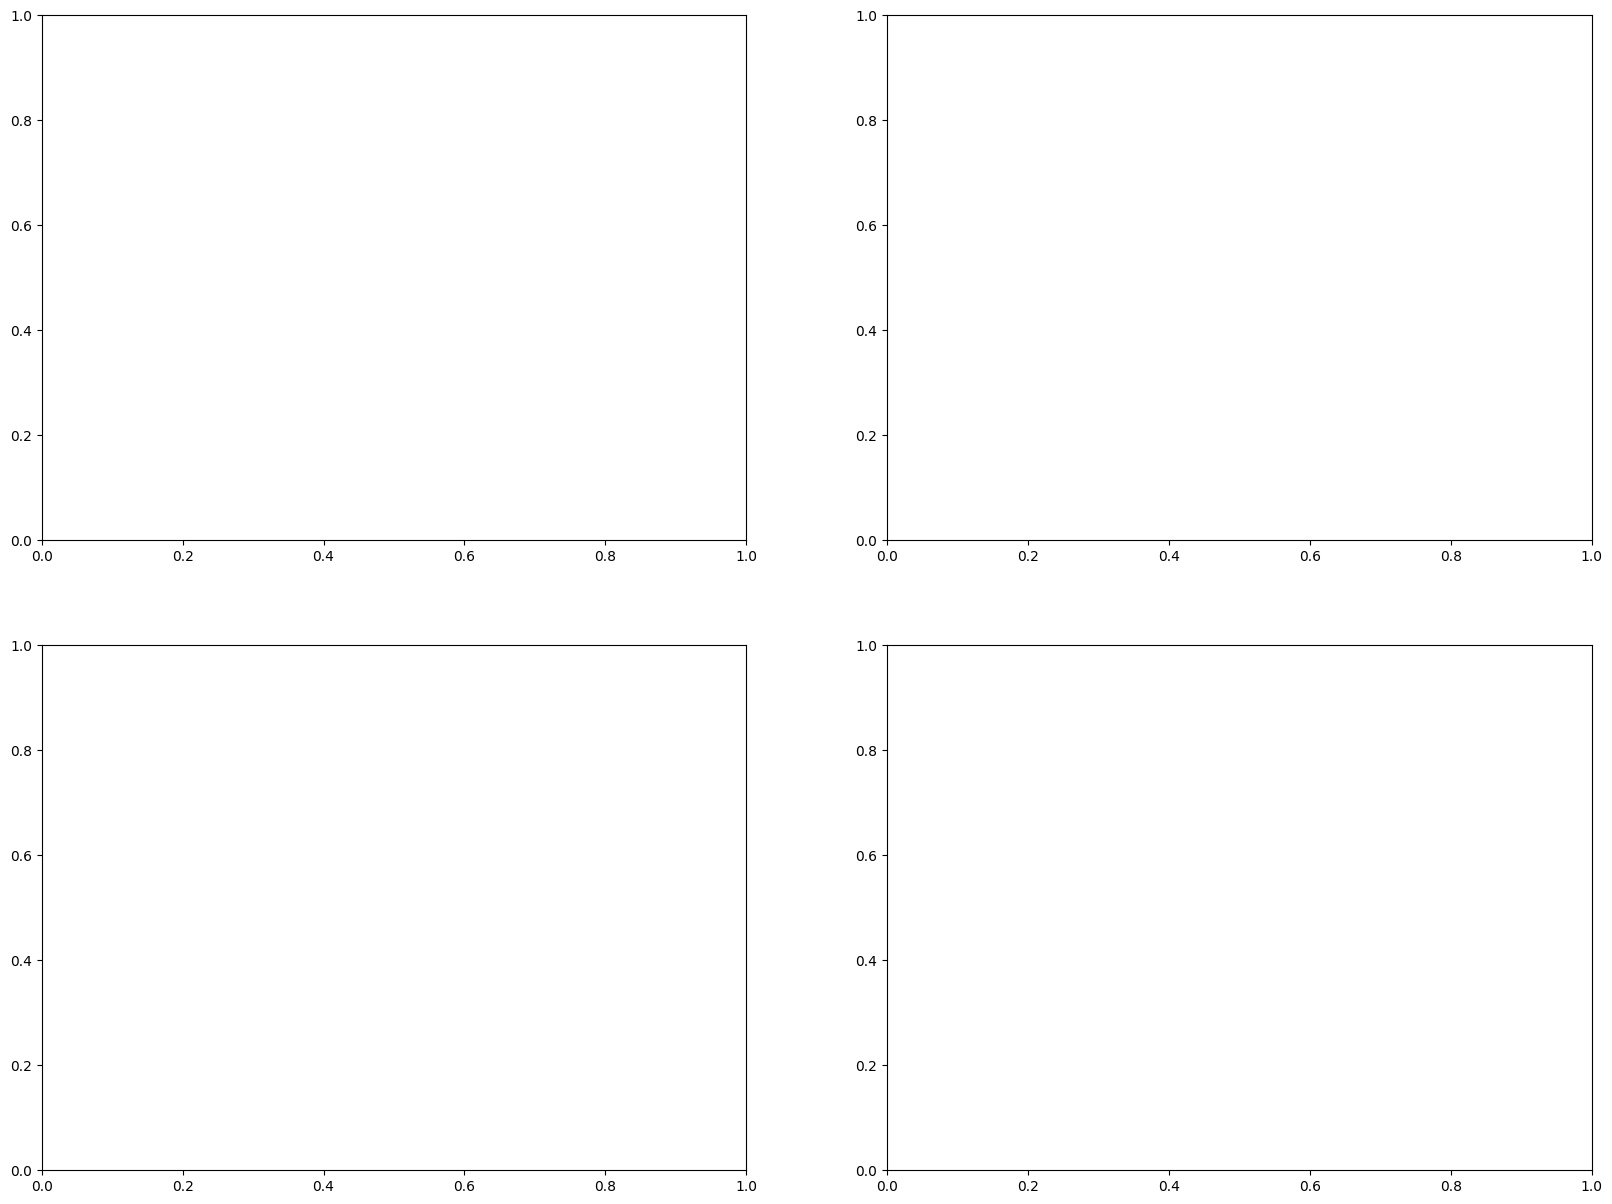

In [ ]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [ ]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 [==============================] - 406s 17s/step


Text(0.5, 1.0, 'Training Image')

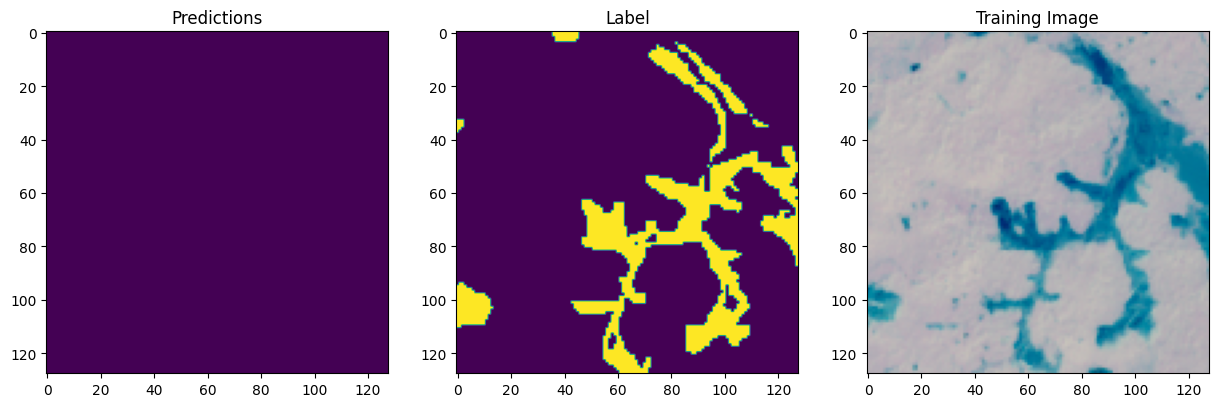

In [ ]:
img = 155
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')